Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8818 - loss: 0.4369 - val_accuracy: 0.9643 - val_loss: 0.1235
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9613 - loss: 0.1301 - val_accuracy: 0.9707 - val_loss: 0.1079
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9752 - loss: 0.0833 - val_accuracy: 0.9767 - val_loss: 0.0801
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9819 - loss: 0.0598 - val_accuracy: 0.9788 - val_loss: 0.0800
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9778 - val_loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0837
Test Accuracy: 0.9759


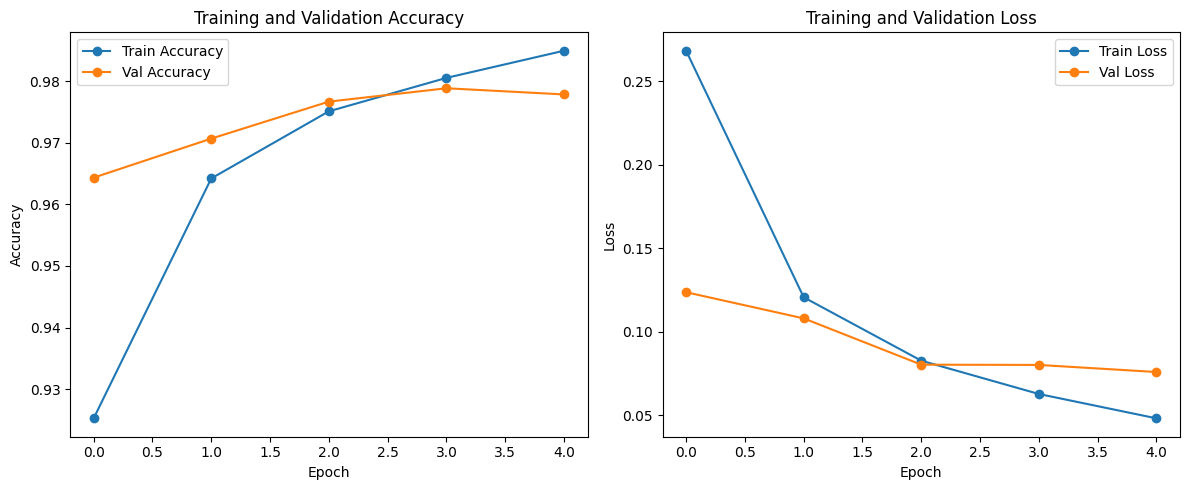

In [2]:
# Install TensorFlow if not already installed

# Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store training history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
